# Prototyping pointilism project
Notebook to prototype turning images in points

In [314]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import display

from random import random
from math import sqrt
from math import floor

## Bring in an image

In [99]:
image = Image.open('IMG_0290.jpg')

In [294]:
image = image.resize(size=[500, 250])

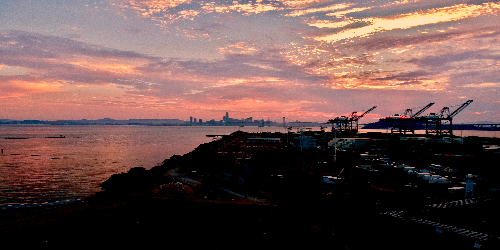

In [295]:
image

In [102]:
# Get np array of image
np_image = numpy.array(image).astype('float')

## Define functions for simple rectangular plotting

In [284]:
def getColorOfPixel(array, loc, r):
    """Returns RGB tuple [0,1] of average color of the np array
    of an image within a square of width 2r at location loc=[x,y]"""
    left = max(loc[0]-r,0)
    right = min(loc[0]+r,array.shape[1])
    bottom = max(loc[1]-r,0)
    top = min(loc[1]+r,array.shape[0])
    x = range(left,right)
    y = range(bottom,top)
    if len(x) == 0 | len(y) == 0: return (np.nan,np.nan,np.nan)
    R = array[np.ix_(y, x, [0])].mean()/255
    G = array[np.ix_(y, x, [1])].mean()/255
    B = array[np.ix_(y, x, [2])].mean()/255
    return (R,G,B)
    

In [275]:
def plotColorPoint(array, loc, r):
    """Plots point at loc with size r with average color from 
    same in array"""
    color = getColorOfPixel(np_image,loc,r)
    plt.scatter(loc[0],-loc[1], color = color, s = r*r)

In [276]:
def plotRecPoints(array,r,step):
    """Plots rectangular array of points over an image array"""
    for x in range(r+1,np_image.shape[1],step):
        for y in range(r+1,np_image.shape[0],step):
            plotColorPoint(np_image,[x,y],size)

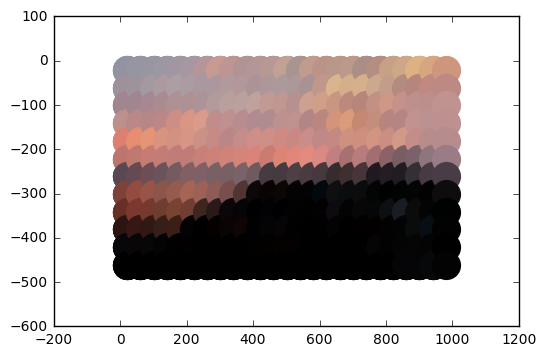

In [277]:
plotRecPoints(np_image,20,40)
plt.show()

## Now random plotting

In [318]:
def plotRandomPoints(array, n, constant):
    """plots random points over image"""
    h = array.shape[0]
    w = array.shape[1]
    for i in range(0,n):
        loc = [int(random()*w), int(random()*h)]
        r = int(random()*w*constant)
        plotColorPoint(array,loc,r)

## Bring it together

In [328]:
fig = plt.figure(figsize=[10,5])
plotRecPoints(np_image,20,20)
plotRandomPoints(np_image,10000,0.01)

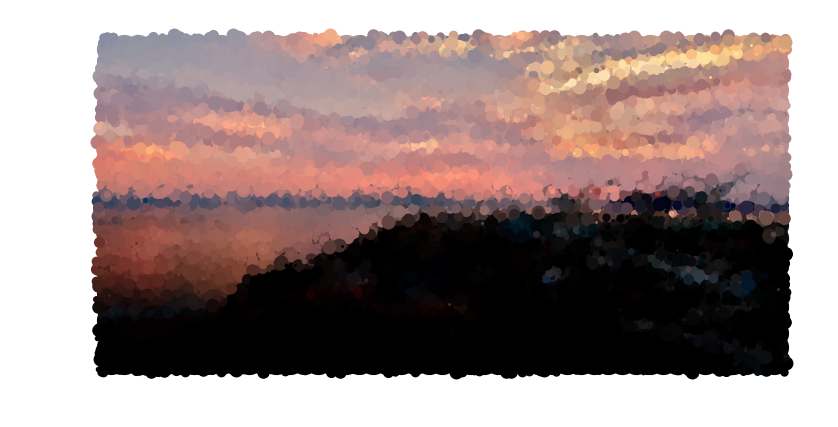

In [329]:
plt.axis("off")
plt.axis("tight")
fig.savefig("out.png",bbox_inches="tight")
display(fig)